# Online Shoppers Purchasing Intention Prediction

## TO DO
* finish EDA and add conclusion
* try more models to get better resuts than baseline
* try unsupersived learning to classify customers
* add references

## Importing libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder

## Uploading dataset

In [60]:
df = pd.read_csv('data/online_shoppers_intention.csv')
df.shape

(12330, 18)

In [29]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Redefining data type for some features
'OperatingSystems', 'Browser', 'Region', 'TrafficType' contain numerical values but are actually categorical features.

In [61]:
df.loc[:,['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('object')

## EDA
Now, let's perform some basic Exploratory Data Analysis (EDA).

In [62]:
sns.set_theme()

### General statistics
We'll start with generic statistics to understand the distribution of data, identify any anomalies, and get a sense of the data quality.

Let's start with the quality of the data

In [33]:
# Search for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [63]:
# Search for duplicate values
df.duplicated().sum(), df.shape

(125, (12330, 18))

There are no missing values in the dataset but we found 125 duplicated rows. Given that they are complete duplicates, we will remove them.

In [64]:
# We get rid of duplicated data
df.drop_duplicates(inplace=True, keep='first')
df.duplicated().sum(), df.shape

(0, (12205, 18))

Let's now look at measures like mean, median, standard deviation, and count for numerical attributes, and frequency counts for categorical attributes.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType              12

Among the features we have: 1 boolean, 14 numerical and 2 categorical attributes.

Let's now calculate general statistics of the dataset.

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


We can note that:

1. The 'Administrative', 'Informational', 'Product Related', and their respective duration attributes show a wide range of values. This suggests a significant variation in how different visitors interact with the website. For instance, 'Product Related' visits range from 0 to 705, indicating diverse visitor engagement levels.

2. The 'Administrative Duration', 'Informational Duration', and 'Product Related Duration' have high standard deviations compared to their means, suggesting that the time spent on these pages varies greatly among users.

3. The 'Bounce Rates' and 'Exit Rates' are relatively low on average but with notable variability (standard deviation close to the mean). This indicates that while most pages perform well in retaining visitors, some pages might be causing visitors to leave.

4. The 'Page Values' attribute, which indicates the average value of a web page in the path to a transaction, varies greatly (mean of 5.89 but a high standard deviation of 18.57), suggesting that some pages are much more influential in leading to sales.

5. The 'Special Day' feature has a low mean (0.061), indicating that most visits are not near special days. However, further analysis might reveal spikes in transactions or visits near specific dates.

### Categorical features visualisation

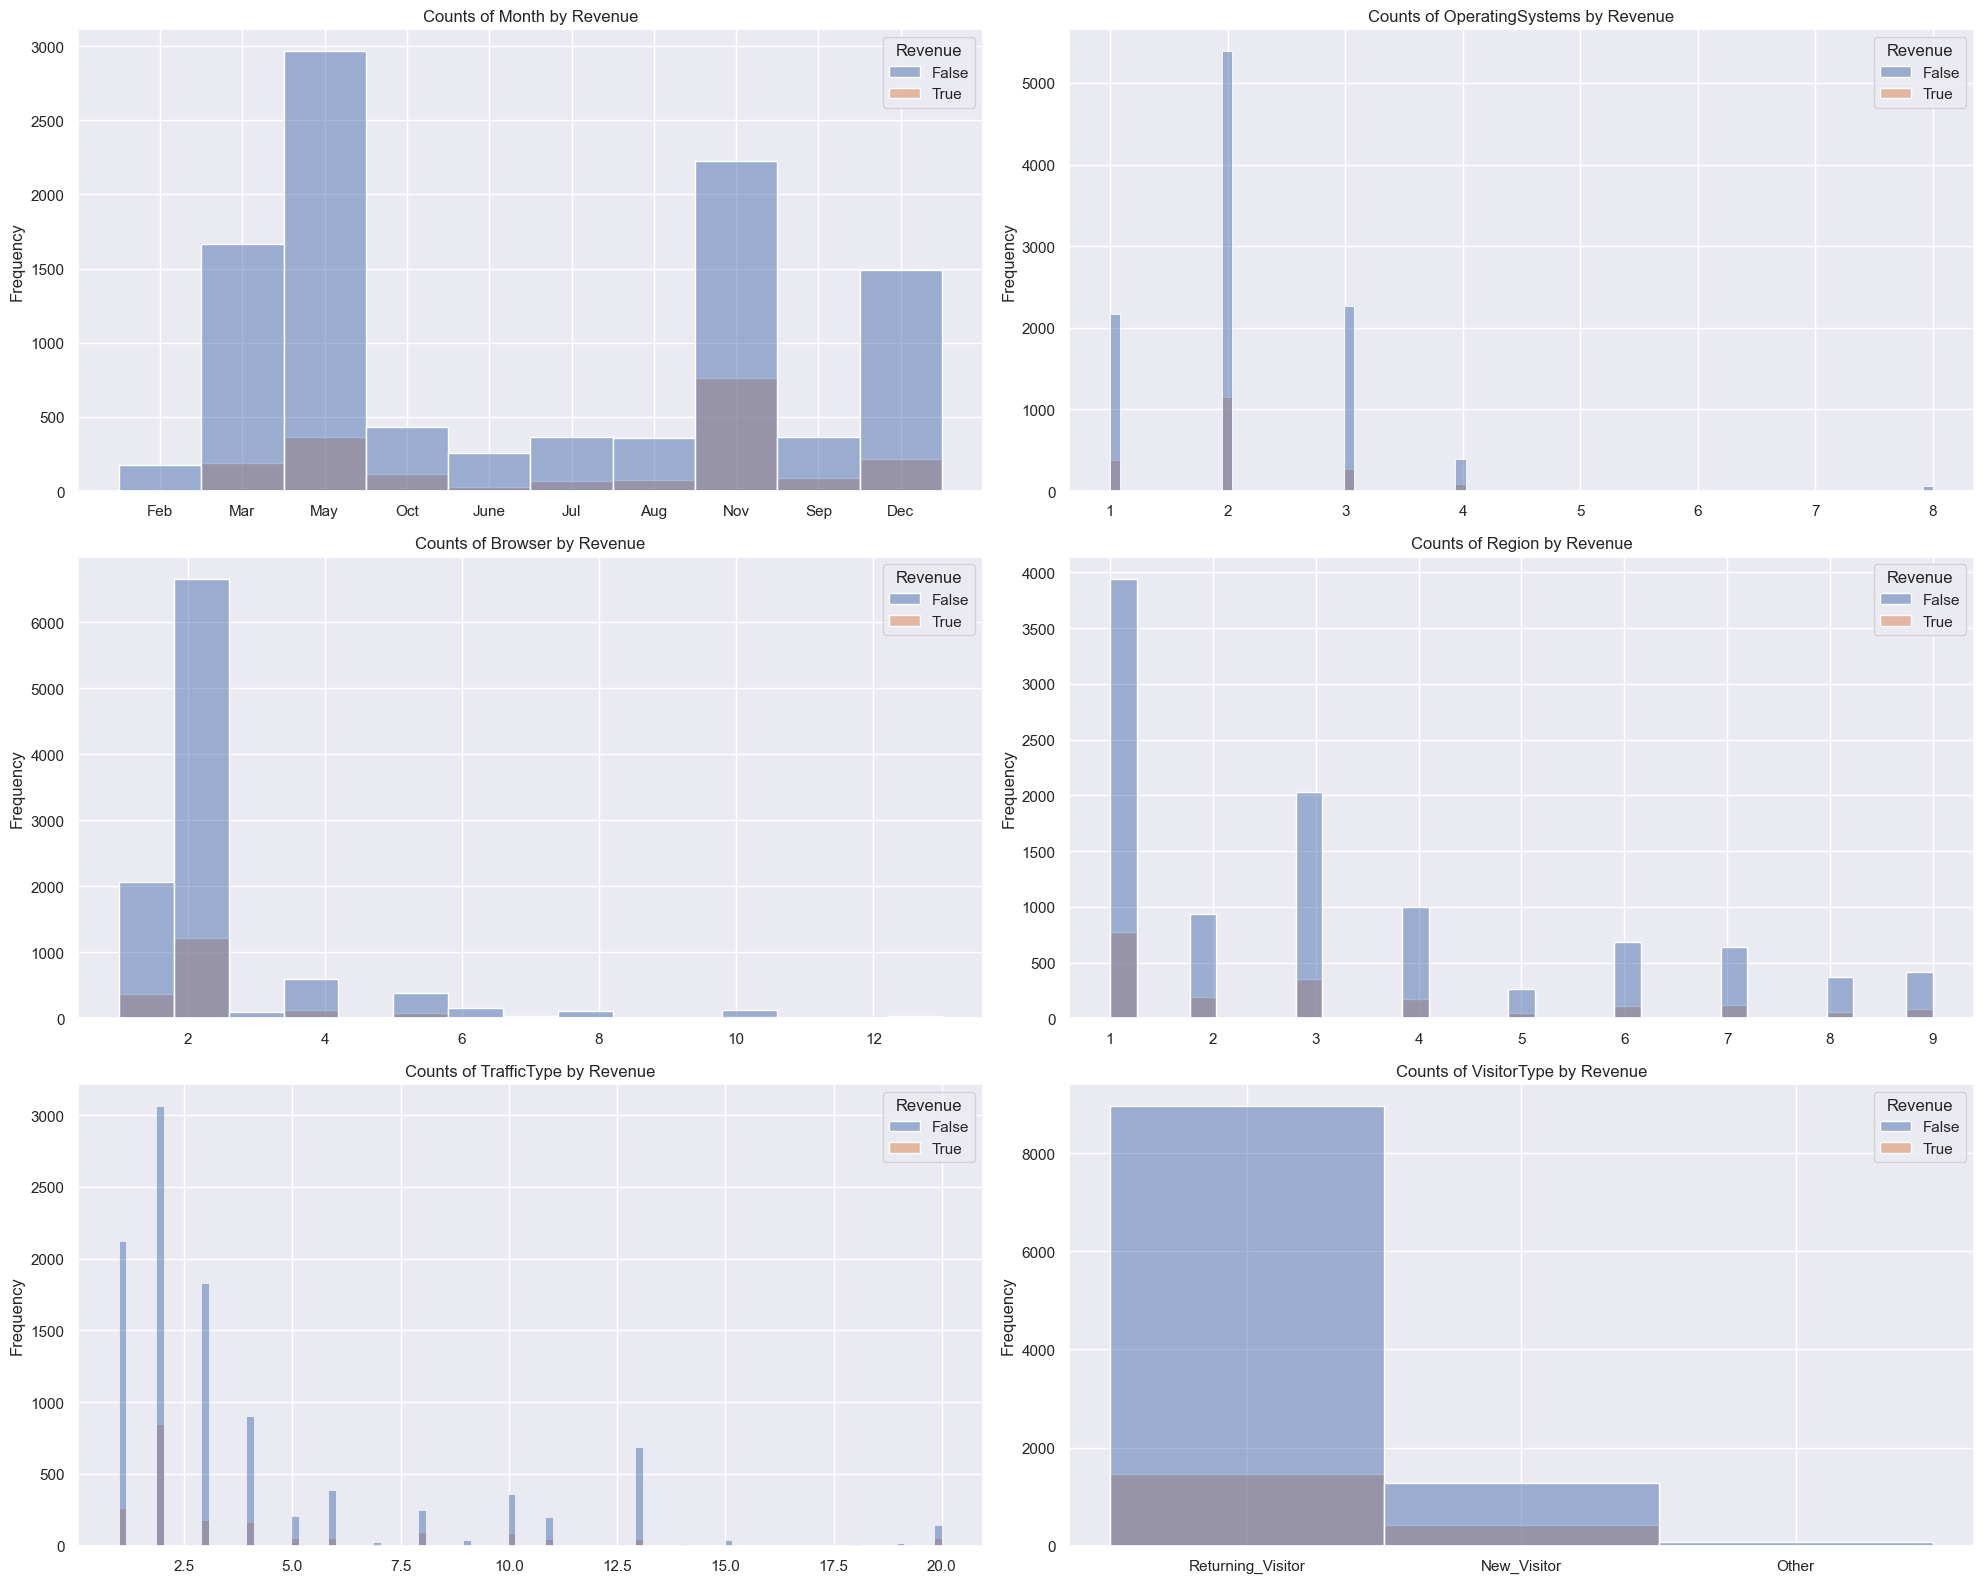

In [38]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='object').columns, axes.flatten()):
    sns.histplot(data=df, x=df[col].values, hue="Revenue", ax=ax)
    ax.set_title(f'Counts of {col} by Revenue')
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Conclusions:
* __Month__: There seems to be a seasonal pattern with certain months like November and May having higher frequencies of purchases. This could be due to holiday shopping periods.

* __Operating System__: Some operating systems have higher purchase frequencies which might indicate user preference or a better user experience on those systems.

* __Browser__: Similar to the operating system, some browsers show a higher frequency of purchases. This might be due to compatibility or ease of transaction on certain browsers.

* __Region__: Some regions show higher purchasing behavior. This could be influenced by regional promotions or shipping options.

* __Traffic Type__: Certain types of traffic to the site are more likely to convert into purchases. For example, direct traffic or traffic from certain marketing campaigns may result in higher conversions.

* __Visitor Type__: Returning visitors are more likely to make a purchase than new visitors, indicating the importance of customer retention and the potential value of targeting repeat customers.

### Histograms for numerical features

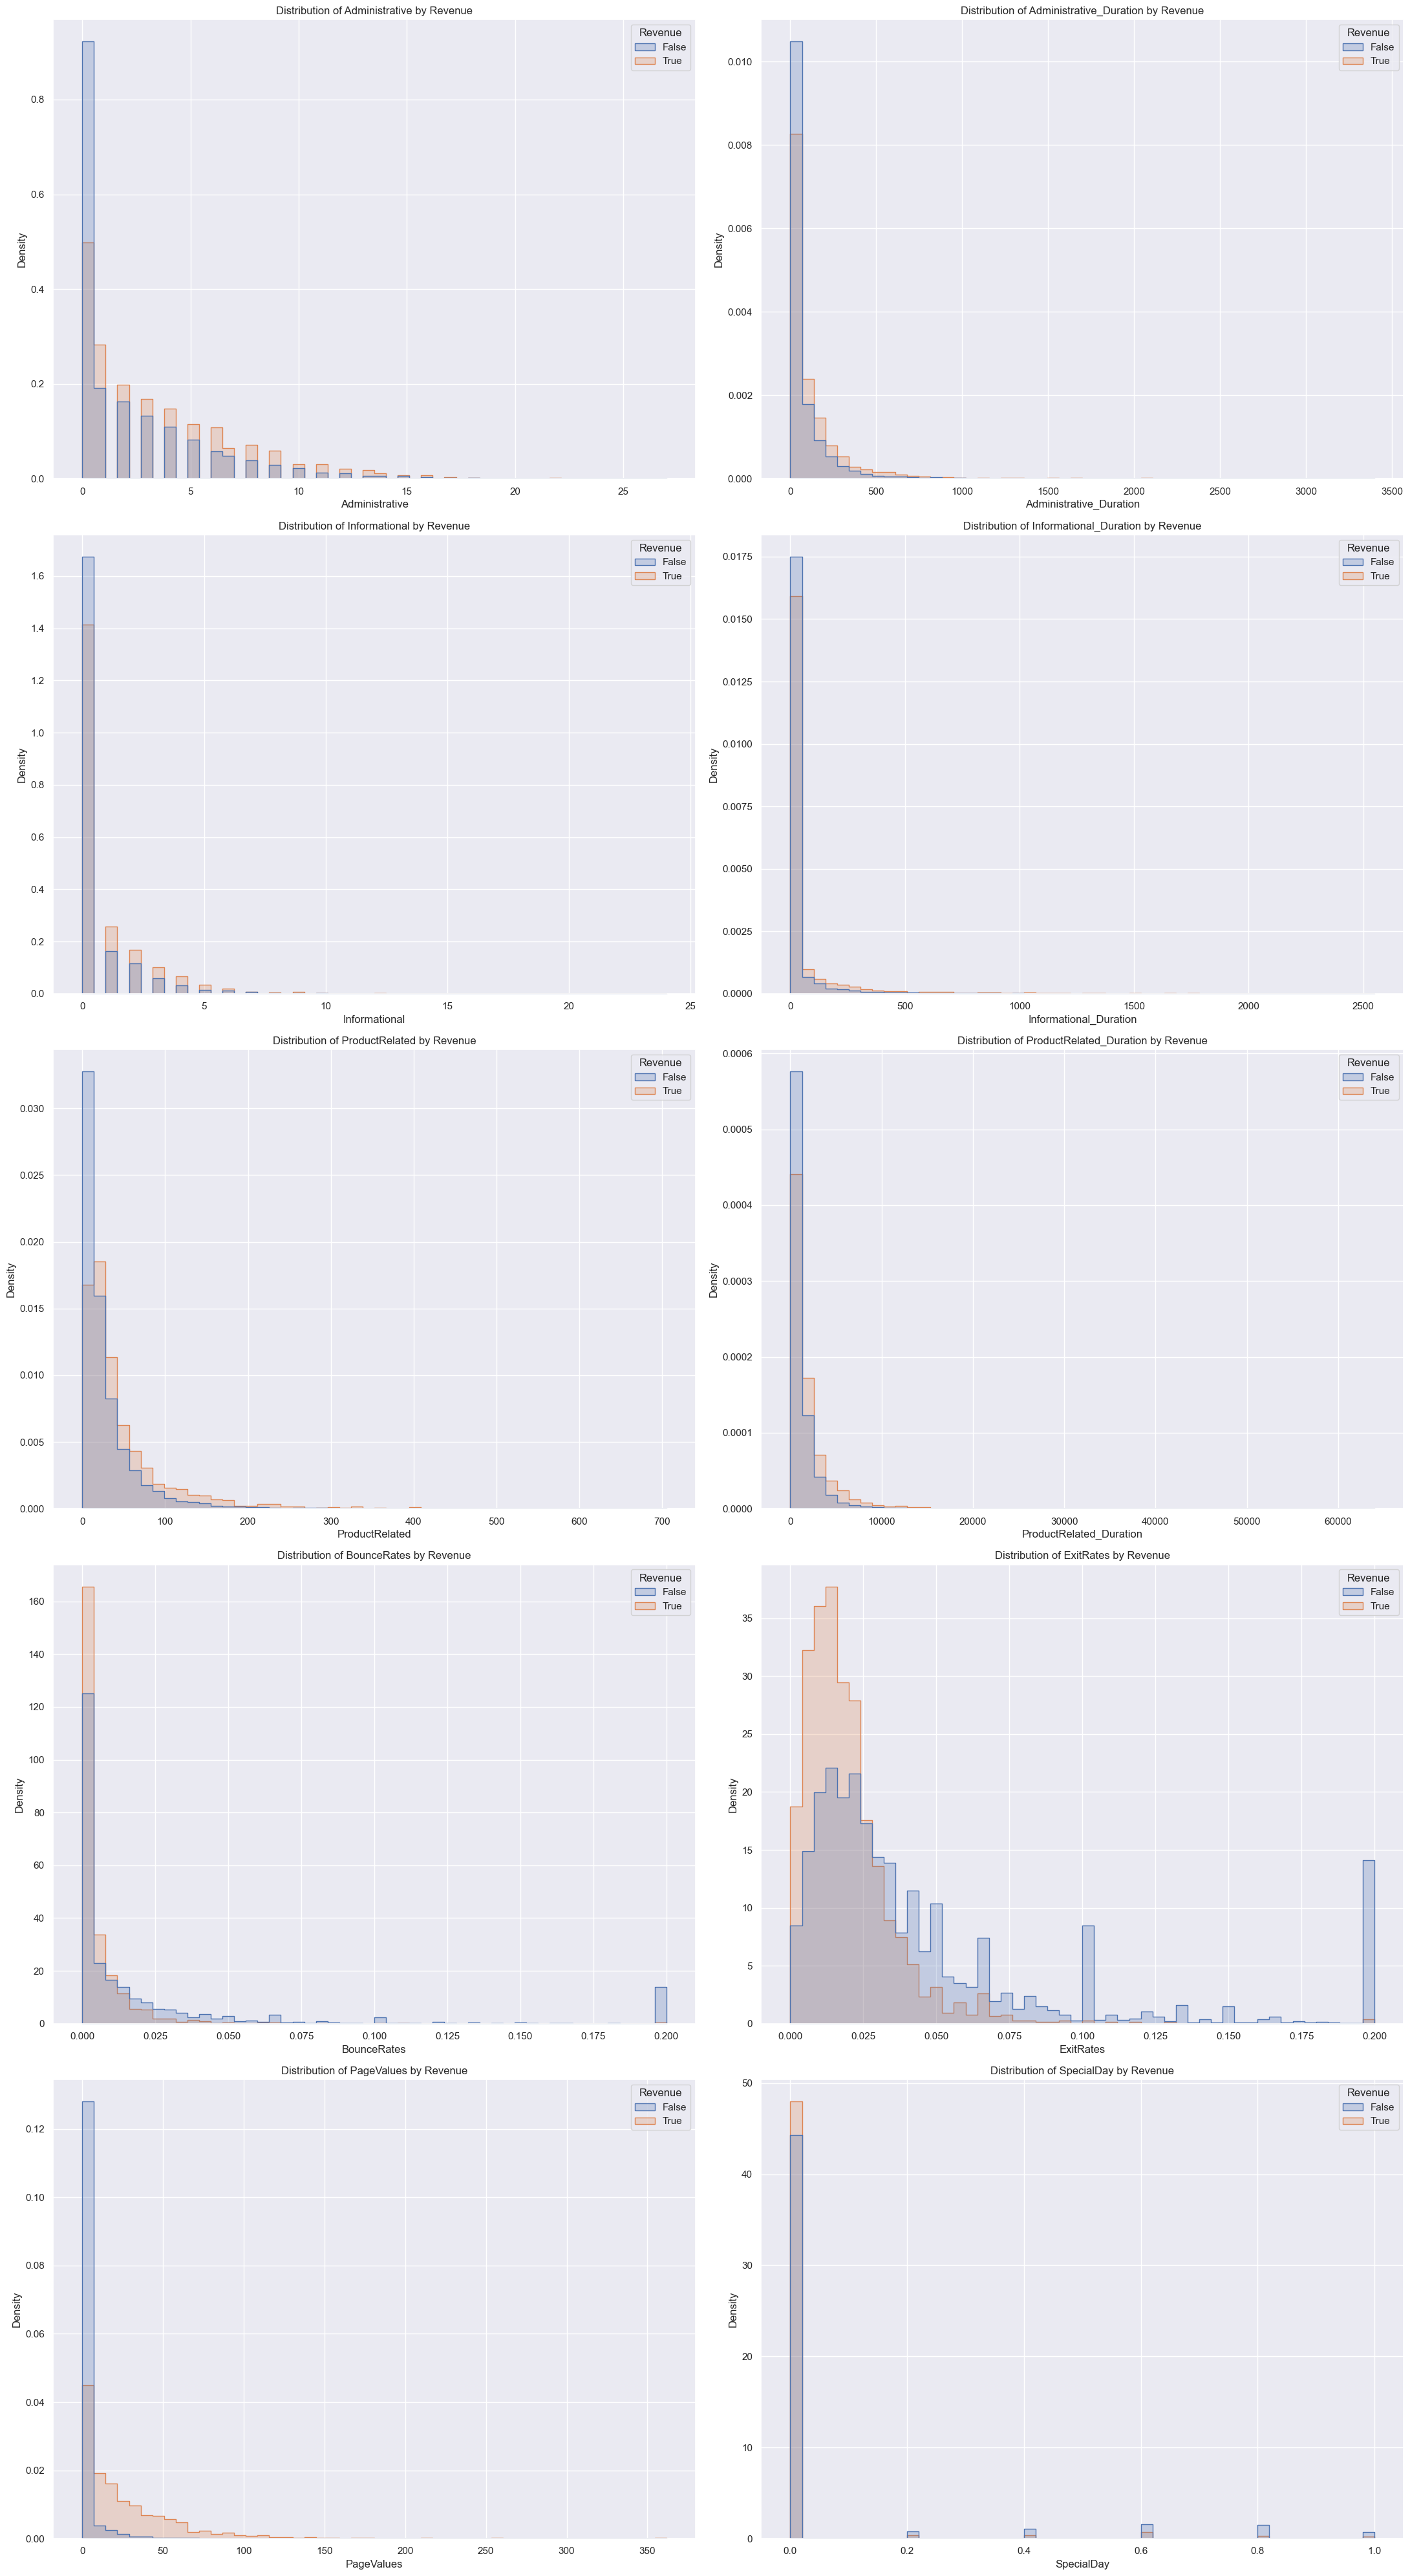

In [39]:
sns.set_theme()
# Set up the matplotlib figure
fig, axes = plt.subplots(5, 2, figsize=(22, 40))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", element="step", stat="density", common_norm=False, bins=50, ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')

plt.tight_layout()
plt.show()


The histograms split by the target variable Revenue give us insights into how different user behaviors and site interactions are associated with the likelihood of a session resulting in a transaction.

* __Administrative, Informational, Product Related__: The number of pages visited in these categories is generally higher for sessions that result in revenue. This suggests that engaging with content across these different page types is positively associated with the likelihood of a transaction.

* __Administrative Duration, Informational Duration, Product Related Duration__: Similarly, the time spent on these types of pages is higher for sessions that result in revenue. This implies that not just the number of pages but also the depth of engagement (as measured by time) correlates with transaction likelihood.

* __Bounce Rate__: The sessions that did not result in revenue tend to have a higher bounce rate. A high bounce rate implies that users are leaving after viewing only one page, which is negatively associated with transactions.

* __Exit Rate__: Sessions with no revenue have higher exit rates, indicating that users are more likely to leave the site from any given page. A lower exit rate in revenue-generating sessions suggests users navigate through more pages before ending their session, which is a positive sign of engagement.

* __Page Value__: There's a clear distinction in page value distribution between revenue and non-revenue sessions. Pages that are visited before a transaction have higher page values, showing their importance in the conversion process.

* __Special Day__: The histogram shows that the presence of revenue is more likely when the 'Special Day' value is closer to zero, implying that regular days may result in more transactions than special days, which could be counterintuitive and warrants further investigation.

### Bivariate analysis

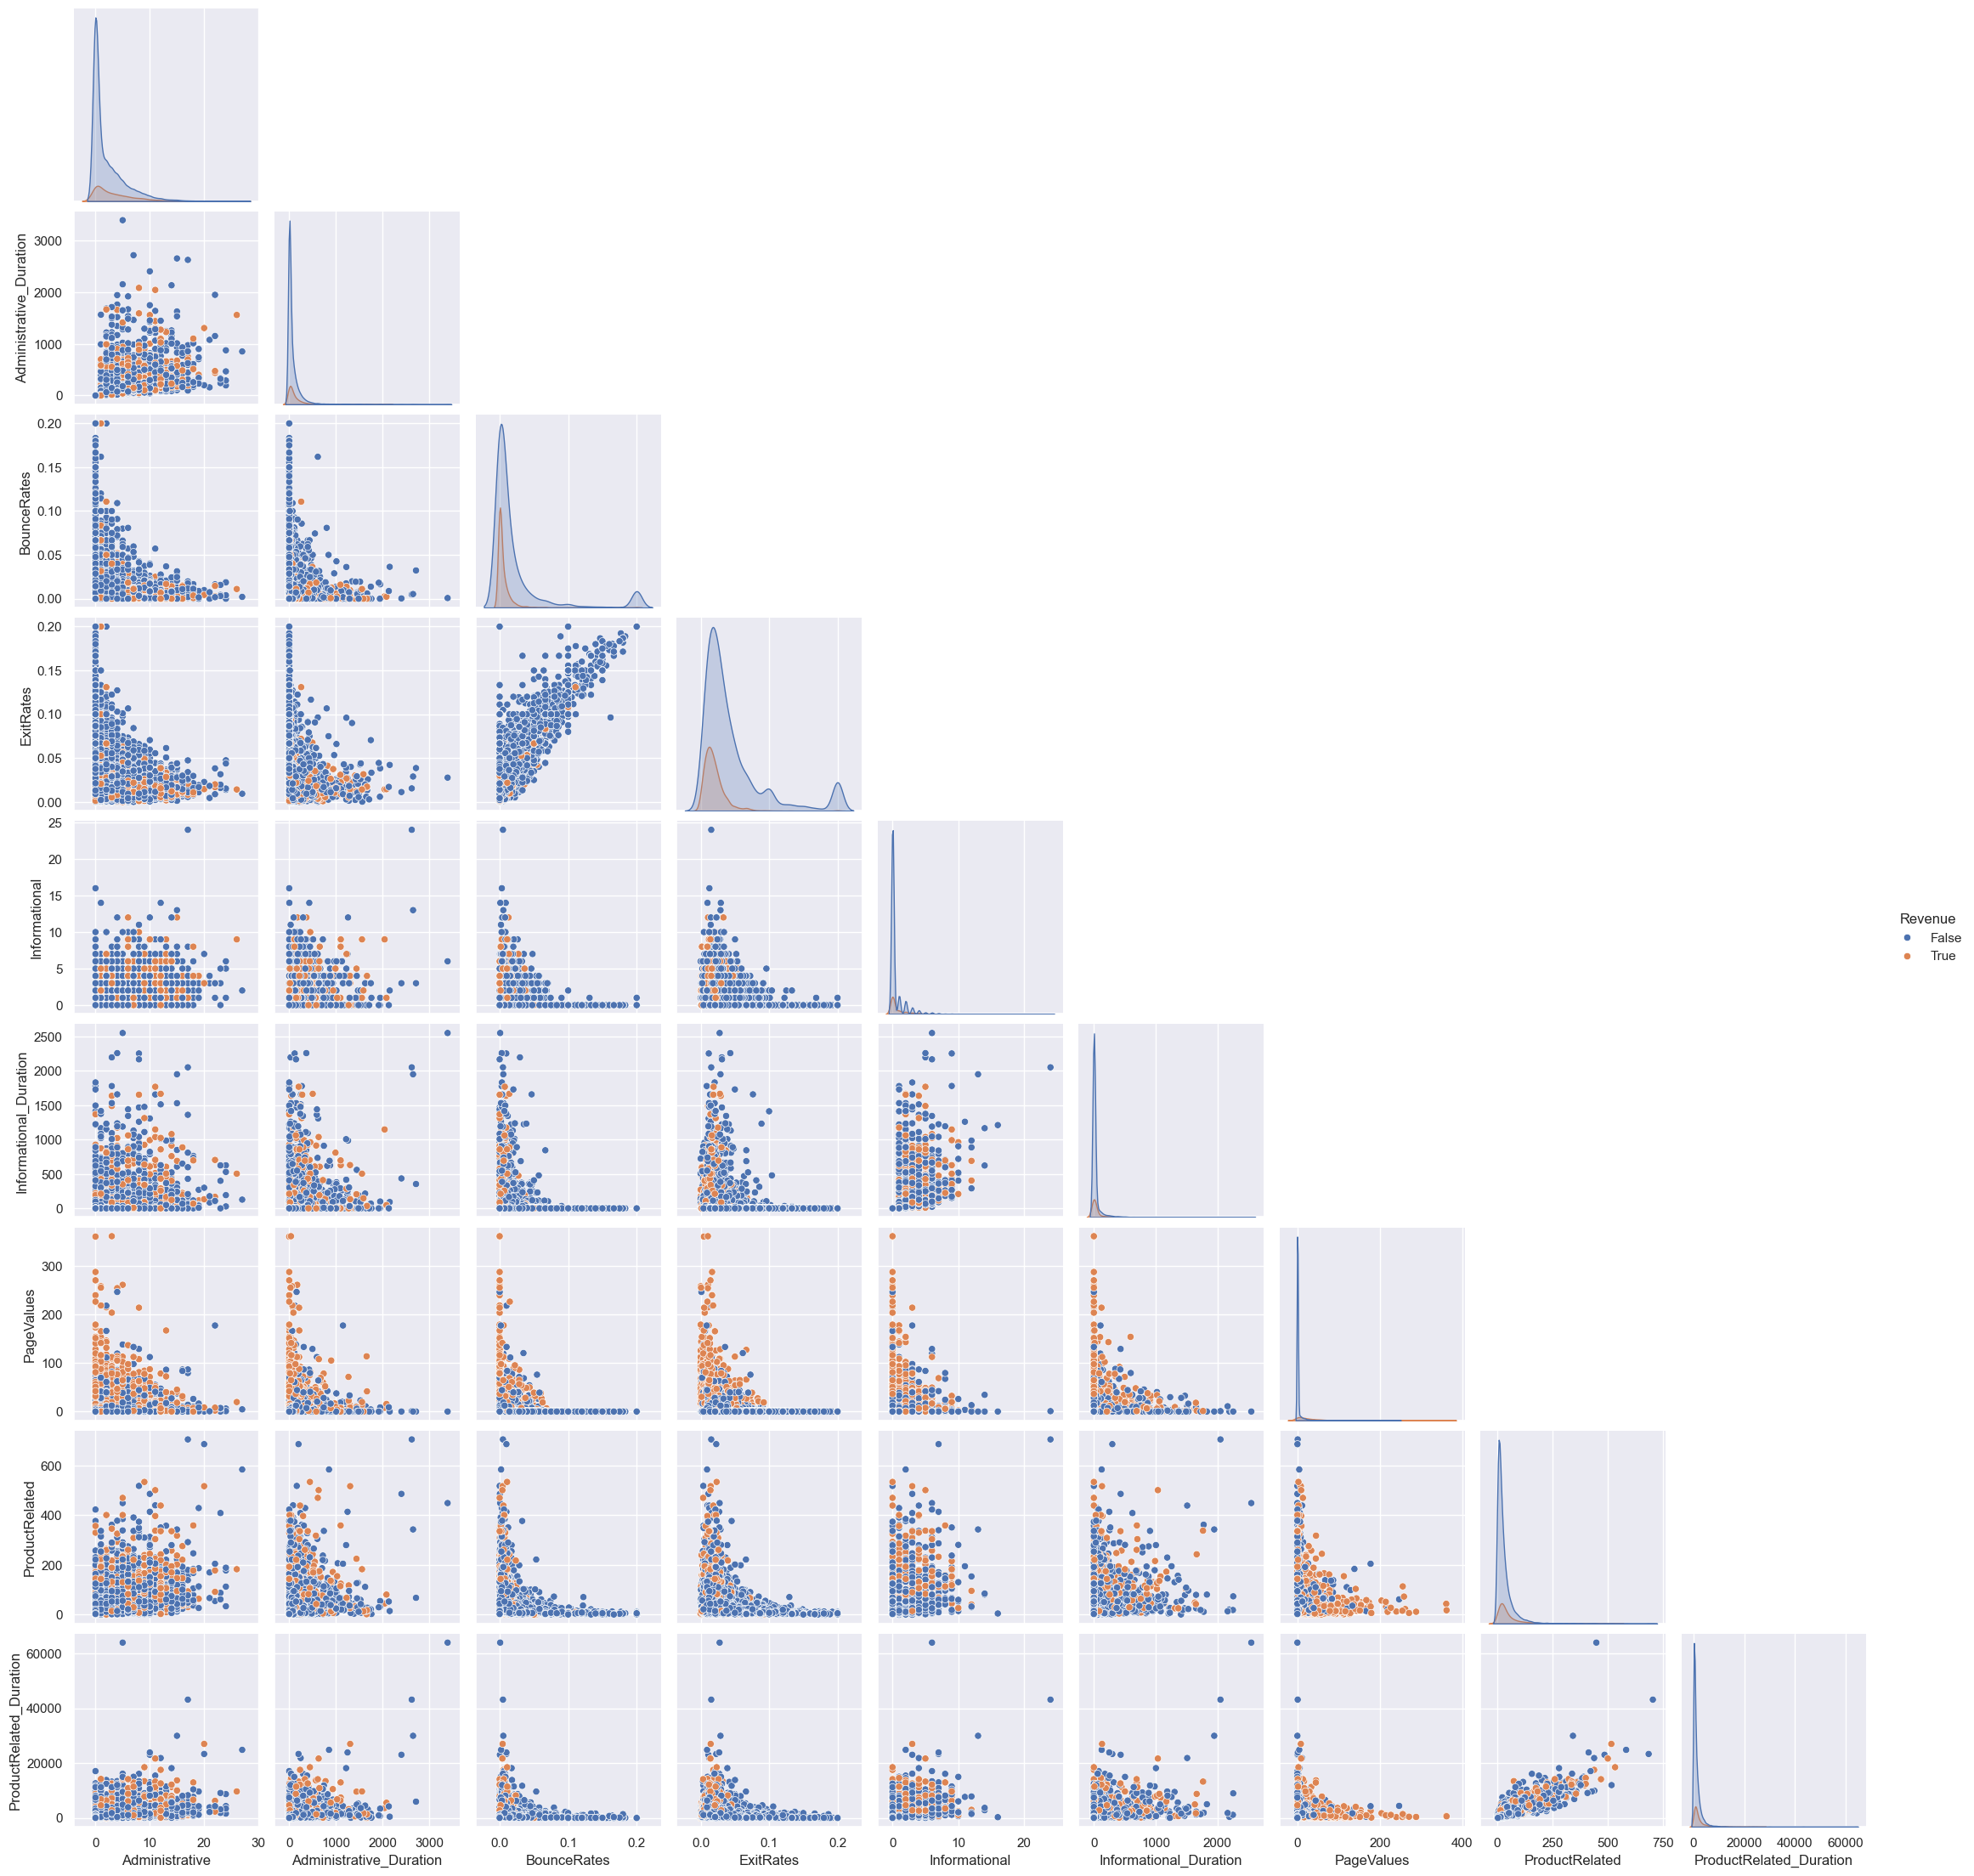

In [40]:
sns.pairplot(df[df.select_dtypes(include=['number', 'bool']).columns.difference(['SpecialDay', 'Weekend'])], hue = 'Revenue', corner=True)

## Correlational Matrix

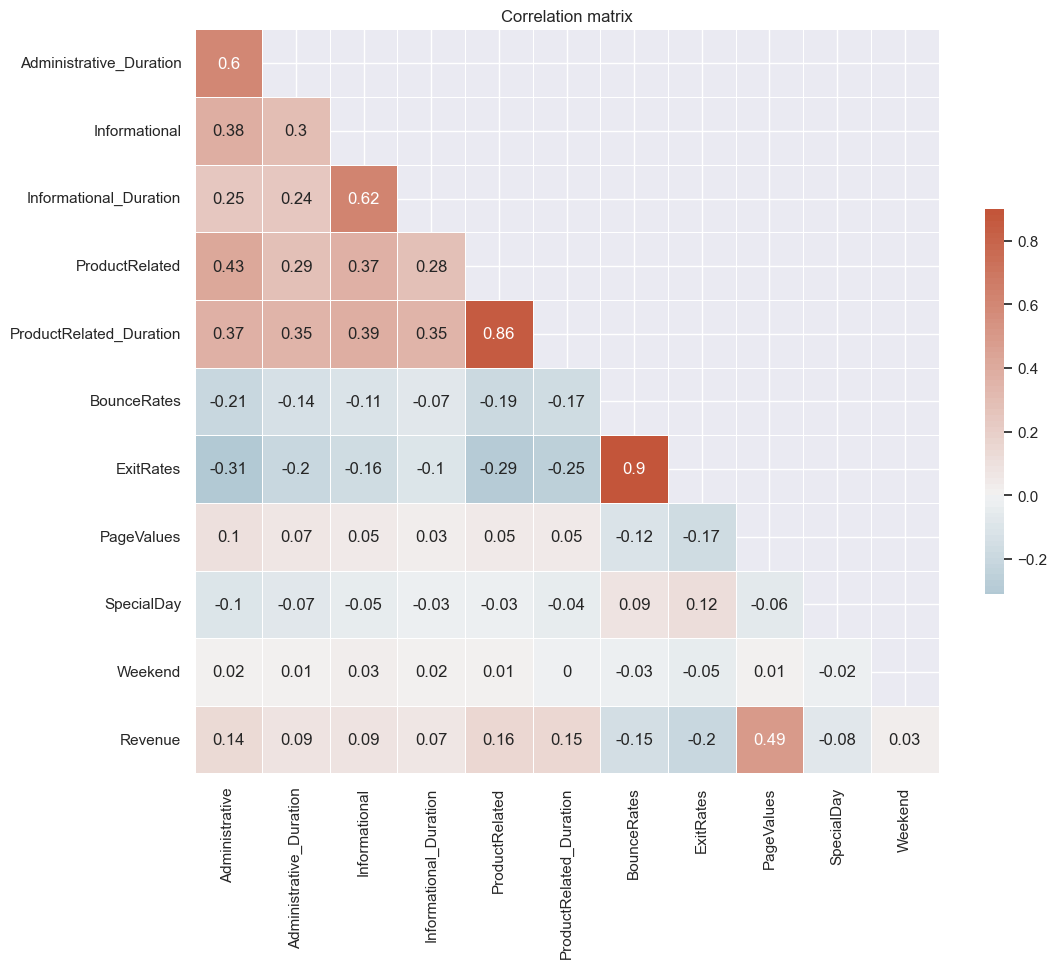

In [41]:
# Moving the Revenue label to the end for better visualisation
cols = [c for c in df if c != 'Revenue'] + ['Revenue']
df = df[cols]

# Correlational Matrix
df_corr_matrix = df[df.select_dtypes(include=['number', 'bool']).columns].corr().round(2)

# Plotting
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr_matrix))
cmap = sns.diverging_palette(230, 20, n=100)
ax = sns.heatmap(df_corr_matrix, mask=mask, annot=True, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xlim(0,len(df_corr_matrix)-1)
ax.set_ylim(len(df_corr_matrix),1)
#ax.collections[0].set_clim(-1,1) 
plt.title('Correlation matrix')
plt.show()

## Preprocessing

### Encoding the Month feature using cyclical encoding

In [69]:
# Assign a numerical value to each month
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
    'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month_num'] = df['Month'].map(month_to_num)

# Encode with sine and cosine
df['month_sin'] = np.sin((df['month_num'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month_num'] - 1) * (2. * np.pi / 12))

df.drop(columns=['Month', 'month_num'], inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_sin,month_cos
0,0.0,0.0,0.0,0.0,0.693147,0.000000,0.182322,0.182322,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,0.5,0.866025
1,0.0,0.0,0.0,0.0,1.098612,4.174387,0.000000,0.095310,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,0.5,0.866025
2,0.0,0.0,0.0,0.0,0.693147,0.000000,0.182322,0.182322,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,0.5,0.866025
3,0.0,0.0,0.0,0.0,1.098612,1.299283,0.048790,0.131028,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,0.5,0.866025
4,0.0,0.0,0.0,0.0,2.397895,6.443336,0.019803,0.048790,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,0.5,0.866025


### Encoding VisitorType feature

In [70]:
df['VisitorType_Returning_Visitor'] = 0
df['VisitorType_New_Visitor'] = 0
df['VisitorType_Other'] = 0

df.loc[df['VisitorType']=='Returning_Visitor', 'VisitorType_Returning_Visitor'] = 1
df.loc[df['VisitorType']=='New_Visitor', 'VisitorType_New_Visitor'] = 1
df.loc[df['VisitorType']=='Other', 'VisitorType_Other'] = 1

df.drop(columns=['VisitorType'], inplace=True)

### Encoding all the others categorical features with OneHotEncoding

In [71]:
encoder = OneHotEncoder(sparse_output=False)

for col in df.select_dtypes(include='object'):
    transformed = encoder.fit_transform(df[[col]])
    
    encoded_df = pd.DataFrame(transformed, columns=[f"{col}_{category}" for category in encoder.categories_[0]]) # Create a DataFrame from the encoded columns
   
    df = df.join(encoded_df.set_index(df.index)) # Add the new columns to the original DataFrame


df.drop(columns=df.select_dtypes(include='object').columns, inplace=True) # Drop the original categorical columns


In [45]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'month_sin', 'month_cos', 'VisitorType_Returning_Visitor',
       'VisitorType_New_Visitor', 'VisitorType_Other', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'Traffic

## Train-test split

In [46]:
y = df['Revenue'] # Labels
X = df[df.columns.difference(['Revenue', 'VisitorType']).to_list()] # Features

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [48]:
# Baseline using Random Classifier
majority_class_baseline = DummyClassifier(strategy='uniform')
majority_class_baseline.fit(X_train, y_train)
y_pred_majority = majority_class_baseline.predict(X_test)

print("Random Baseline:")
print(classification_report(y_test, y_pred_majority))

Random Baseline:
              precision    recall  f1-score   support

       False       0.86      0.51      0.64      2079
        True       0.16      0.52      0.24       362

    accuracy                           0.51      2441
   macro avg       0.51      0.52      0.44      2441
weighted avg       0.76      0.51      0.58      2441



In [49]:
# BAseline using Most Frequent Classifier
majority_class_baseline = DummyClassifier(strategy='most_frequent')
majority_class_baseline.fit(X_train, y_train)
y_pred_majority = majority_class_baseline.predict(X_test)

print("Most Frequent Baseline:")
print(classification_report(y_test, y_pred_majority,zero_division=1))

Most Frequent Baseline:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2079
        True       1.00      0.00      0.00       362

    accuracy                           0.85      2441
   macro avg       0.93      0.50      0.46      2441
weighted avg       0.87      0.85      0.78      2441



## Logistic Regression

Accuracy: 0.8861122490782466
Confusion Matrix:
[[2030   49]
 [ 229  133]]
Precision: 0.73
Recall: 0.37
F1 Score: 0.49


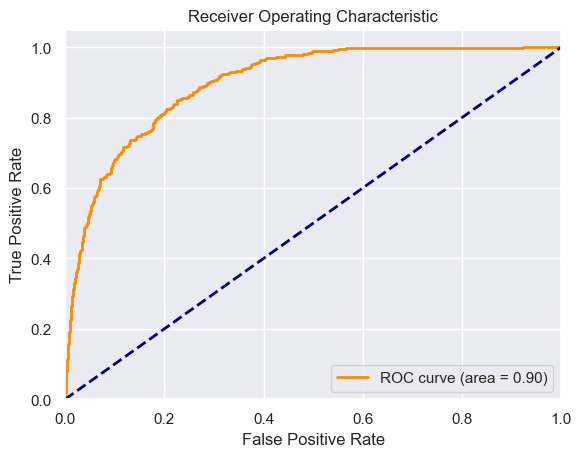

In [50]:
# Create a pipeline that first scales the data then applies logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, solver='lbfgs'))

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate Precision, Recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Handling skewness in the distribution of features

Logistic Regression is heavily affected by skewness in the distribution of the feature. I'll try to apply log-transformation to the features and analyse the results of the logistic regression

In [65]:
numerical_columns_to_transoform = df.select_dtypes(include='number').columns

df[numerical_columns_to_transoform] = df[numerical_columns_to_transoform].apply(np.log1p)

In [67]:
# Search for null values
df[numerical_columns_to_transoform].isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
dtype: int64

Let's look at the distribution of the tranformed features

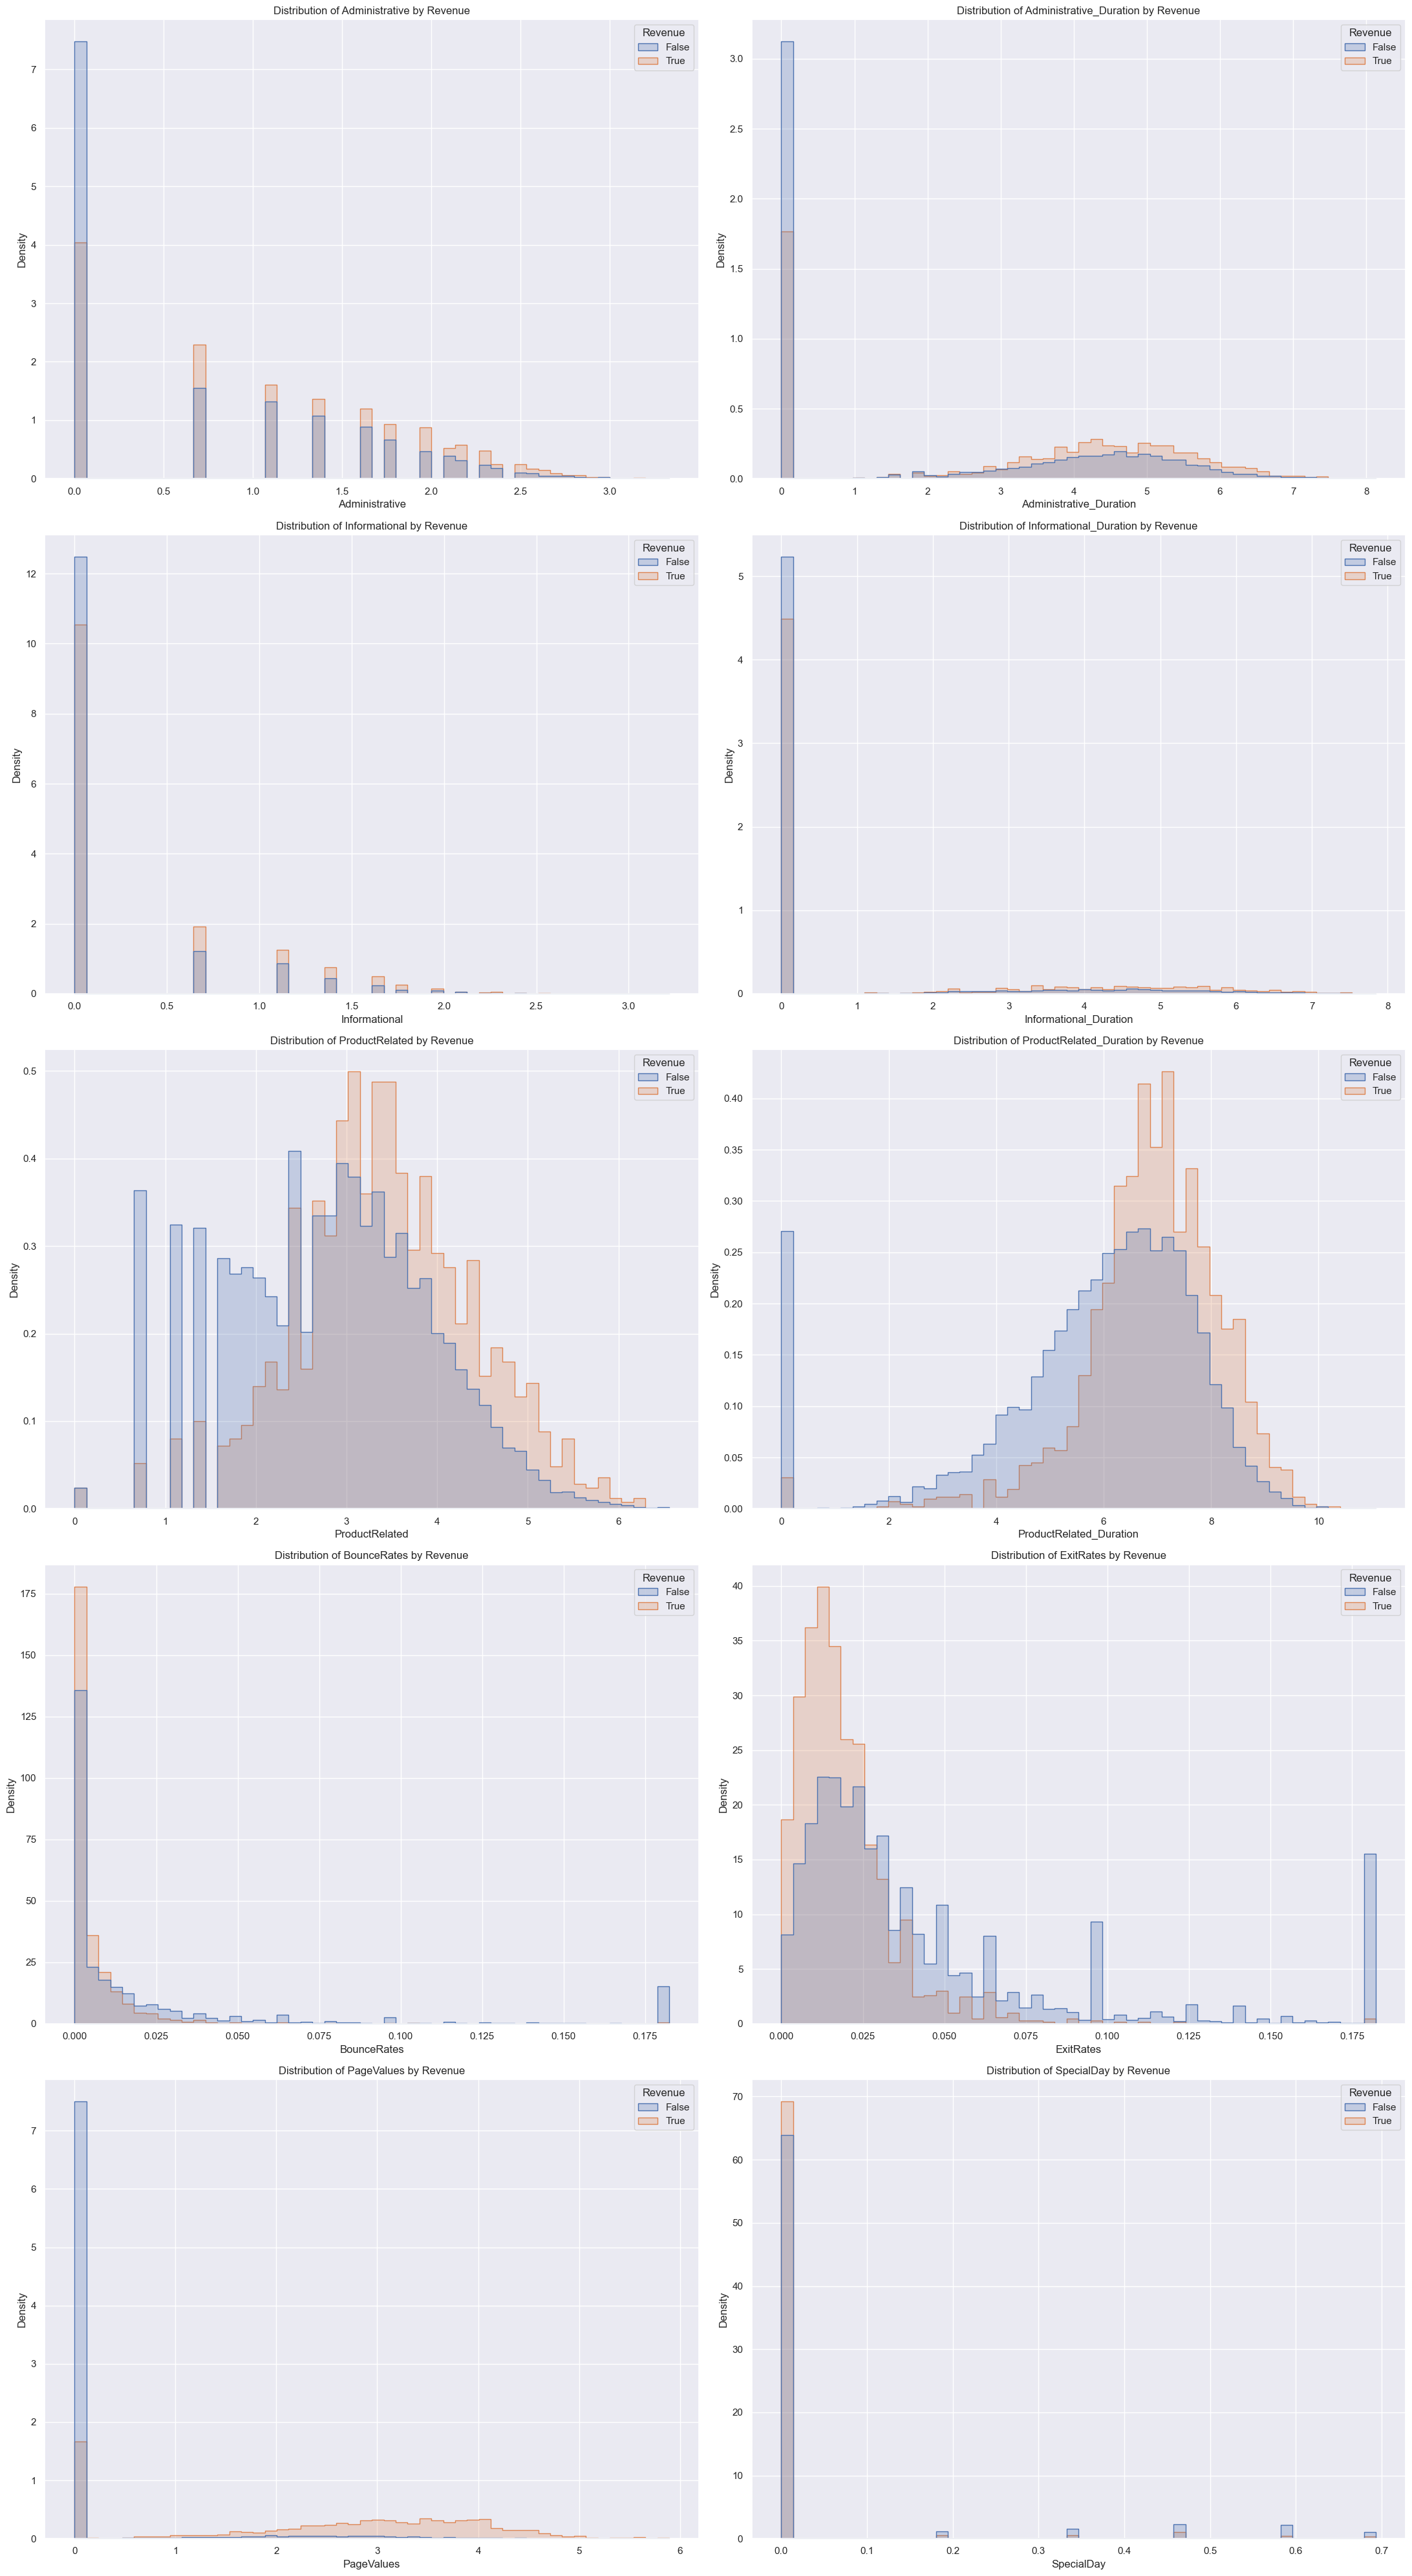

In [68]:
fig, axes = plt.subplots(5, 2, figsize=(22, 40))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", element="step", stat="density", common_norm=False, bins=50, ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')

plt.tight_layout()
plt.show()

Accuracy: 0.8926669397787792
Confusion Matrix:
[[1992   87]
 [ 175  187]]
Precision: 0.68
Recall: 0.52
F1 Score: 0.59


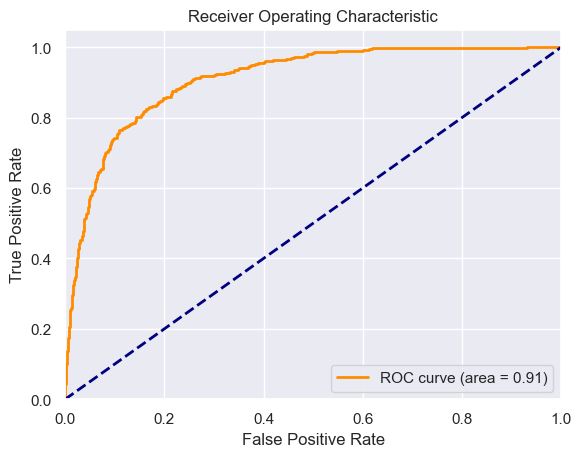

In [72]:
y = df['Revenue'] # Labels
X = df[df.columns.difference(['Revenue', 'VisitorType']).to_list()] # Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline that first scales the data then applies logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, solver='lbfgs'))

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate Precision, Recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()